In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


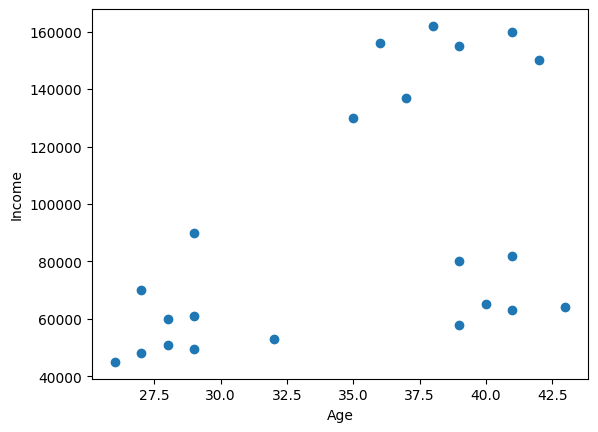

In [3]:
plt.scatter(df['Age'], df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [4]:
km = KMeans(n_clusters=3)
km.fit(df[['Age', 'Income($)']])

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [7]:
y_pred = km.fit_predict(df[['Age', 'Income($)']])

In [8]:
df["cluster"] = y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,0


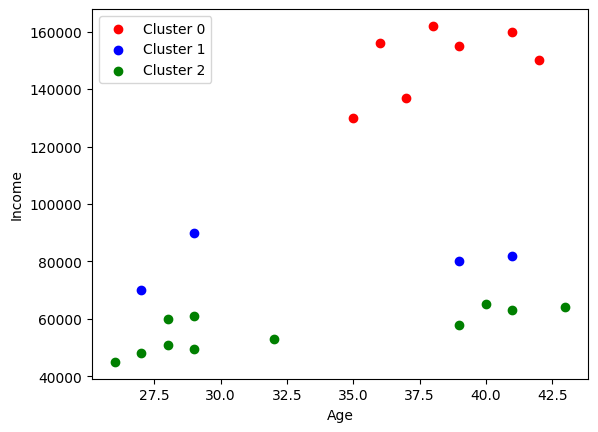

In [13]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1['Age'], df1['Income($)'], c='red', label='Cluster 0')
plt.scatter(df2['Age'], df2['Income($)'], c='blue', label='Cluster 1')
plt.scatter(df3['Age'], df3['Income($)'], c='green', label='Cluster 2')

plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()


In [14]:
scaler = MinMaxScaler()
df[['Age', 'Income($)']] = scaler.fit_transform(df[['Age', 'Income($)']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,0


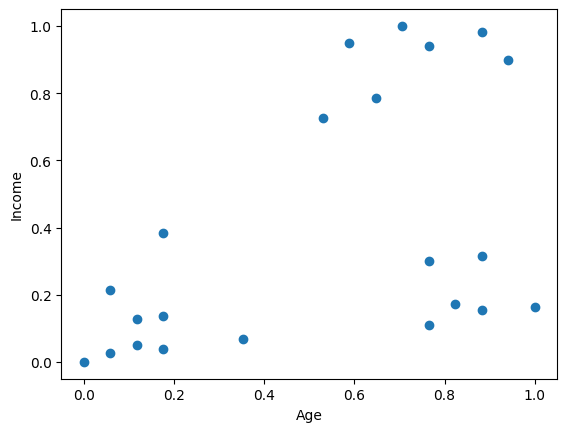

In [15]:
plt.scatter(df['Age'], df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [16]:
km = KMeans(n_clusters=3)
km.fit(df[['Age', 'Income($)']])

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [17]:
y_pred = km.fit_predict(df[['Age', 'Income($)']])
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [18]:
df['cluster'] = y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [20]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

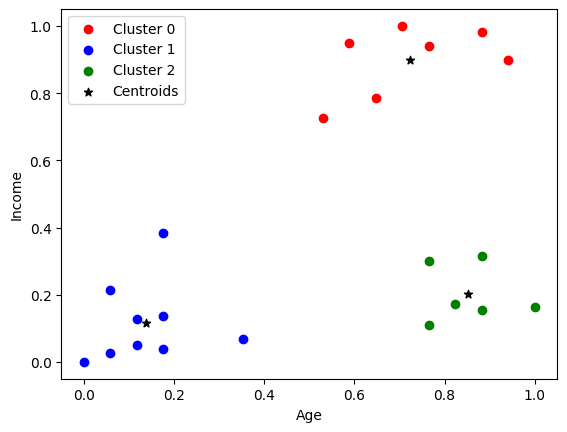

In [25]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1['Age'], df1['Income($)'], c='red', label='Cluster 0')
plt.scatter(df2['Age'], df2['Income($)'], c='blue', label='Cluster 1')
plt.scatter(df3['Age'], df3['Income($)'], c='green', label='Cluster 2')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='black', marker='*', label='Centroids')

plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()

In [29]:
k_range = range(1, 10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)


In [30]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.3881529166478744,
 0.3071350418475292,
 0.27791935427404774,
 0.1685851223602976,
 0.13265419827245162,
 0.11790807312684995]

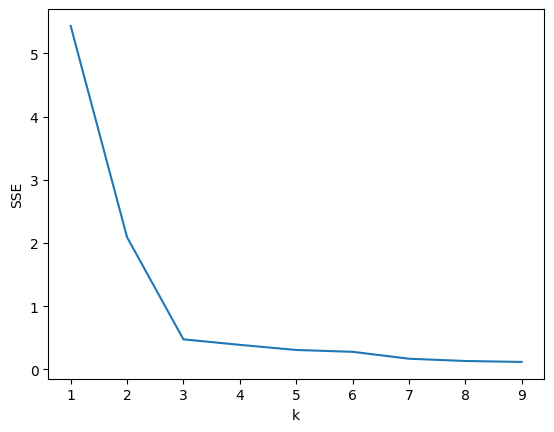

In [31]:
plt.plot(k_range, sse)
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()